In [1]:
import numpy as np
import torch 
import torch.nn as nn
import math 
import h5py
import yaml
import pickle
import sys
import os
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)


import src.models as models
import src.dataset as ds
import src.train_pcdae as train_pcdae
import src.inference_pcdae as inference
import src.data_preparation as data_prep

In [2]:

with h5py.File("scaling_noise_level_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    sigma_vec_pcdae = f['results/sigma_max'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_refine1'][:]
    loss_refine2_pcdae = f['results/loss_refine2'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_sigma = np.unique(sigma_vec_pcdae)
loss_refine1_dict = {ele: [] for ele in unique_sigma}
loss_refine2_dict = {ele: [] for ele in unique_sigma}

for i in range(len(seed_vec_pcdae)):
    
    loss_refine1_dict[sigma_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss_refine2_dict[sigma_vec_pcdae[i]].append(loss_refine2_pcdae[i])


mean_refine1_plot = []
mean_refine2_plot = []
std_refine1_plot = []
std_refine2_plot = []

for i, (size, vec) in enumerate(loss_refine1_dict.items()):
    vec_sqrt = np.sqrt(vec)
    mean_refine1_plot.append(np.mean(vec_sqrt))
    std_refine1_plot.append(np.std(vec_sqrt))

for i, (size, vec) in enumerate(loss_refine2_dict.items()):
    vec_sqrt = np.sqrt(vec)
    mean_refine2_plot.append(np.mean(vec_sqrt))
    std_refine2_plot.append(np.std(vec_sqrt))


mean_refine1_plot = np.array(mean_refine1_plot)
mean_refine2_plot = np.array(mean_refine2_plot)
std_refine1_plot = np.array(std_refine1_plot)
std_refine2_plot = np.array(std_refine2_plot)


In [3]:
print(mean_refine1_plot)
print(std_refine1_plot)

print(mean_refine2_plot)
print(std_refine2_plot)

[0.05674344 0.0361867  0.0332638  0.03021773 0.0313233  0.03072076
 0.03059908]
[0.0302711  0.01987674 0.0177286  0.01564592 0.01555166 0.01437944
 0.01273166]
[0.0625291  0.03651952 0.03326846 0.03023282 0.03132319 0.03072046
 0.03059902]
[0.02967687 0.0201032  0.01774052 0.01565796 0.01555322 0.01437875
 0.01273179]


In [4]:

with h5py.File("scaling_noise_level_ebm_pcdae_sine_V3.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    sigma_vec_pcdae = f['results/sigma_max'][:]
    loss_init_ebm_pcdae = f['results/loss_init'][:]
    loss_refine1_ebm_pcdae = f['results/loss_T'][:]
    loss_refine2_ebm_pcdae = f['results/loss_Tadapt'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_sigma = np.unique(sigma_vec_pcdae)
loss_refine1_ebm_dict = {ele: [] for ele in unique_sigma}
loss_refine2_ebm_dict = {ele: [] for ele in unique_sigma}

for i in range(len(seed_vec_pcdae)):
    loss_refine1_ebm_dict[sigma_vec_pcdae[i]].append(loss_refine1_ebm_pcdae[i])
    loss_refine2_ebm_dict[sigma_vec_pcdae[i]].append(loss_refine2_ebm_pcdae[i])


mean_refine1_ebm_plot = []
std_refine1_ebm_plot = []

mean_refine2_ebm_plot = []
std_refine2_ebm_plot = []

for i, (size, vec) in enumerate(loss_refine1_ebm_dict.items()):
    vec_sqrt = np.sqrt(vec)
    mean_refine1_ebm_plot.append(np.mean(vec_sqrt))
    std_refine1_ebm_plot.append(np.std(vec_sqrt))

mean_refine1_ebm_plot = np.array(mean_refine1_ebm_plot)
std_refine1_ebm_plot = np.array(std_refine1_ebm_plot)


for i, (size, vec) in enumerate(loss_refine2_ebm_dict.items()):
    vec_sqrt = np.sqrt(vec)
    mean_refine2_ebm_plot.append(np.mean(vec_sqrt))
    std_refine2_ebm_plot.append(np.std(vec_sqrt))

mean_refine2_ebm_plot = np.array(mean_refine2_ebm_plot)
std_refine2_ebm_plot = np.array(std_refine2_ebm_plot)


In [5]:
print(mean_refine1_ebm_plot)
print(std_refine1_ebm_plot)

print()
print(mean_refine2_ebm_plot)
print(std_refine2_ebm_plot)

[0.07119307 0.03698897 0.03494433 0.03313121 0.03335014 0.03092522
 0.03231615]
[0.03151512 0.02207129 0.01275754 0.01496022 0.0123768  0.01255636
 0.01260692]

[0.08974195 0.03893033 0.03531992 0.03319338 0.03335932 0.03094455
 0.03234944]
[0.02690097 0.02069258 0.01255978 0.01492053 0.01231878 0.01249518
 0.01256442]


In [6]:

# [0.08493474 0.03671812 0.03182849 0.03365003 0.03443355 0.03173014
#  0.03267749]
# [0.03418831 0.01976348 0.01141518 0.01779661 0.01744362 0.01216716
#  0.01356353]

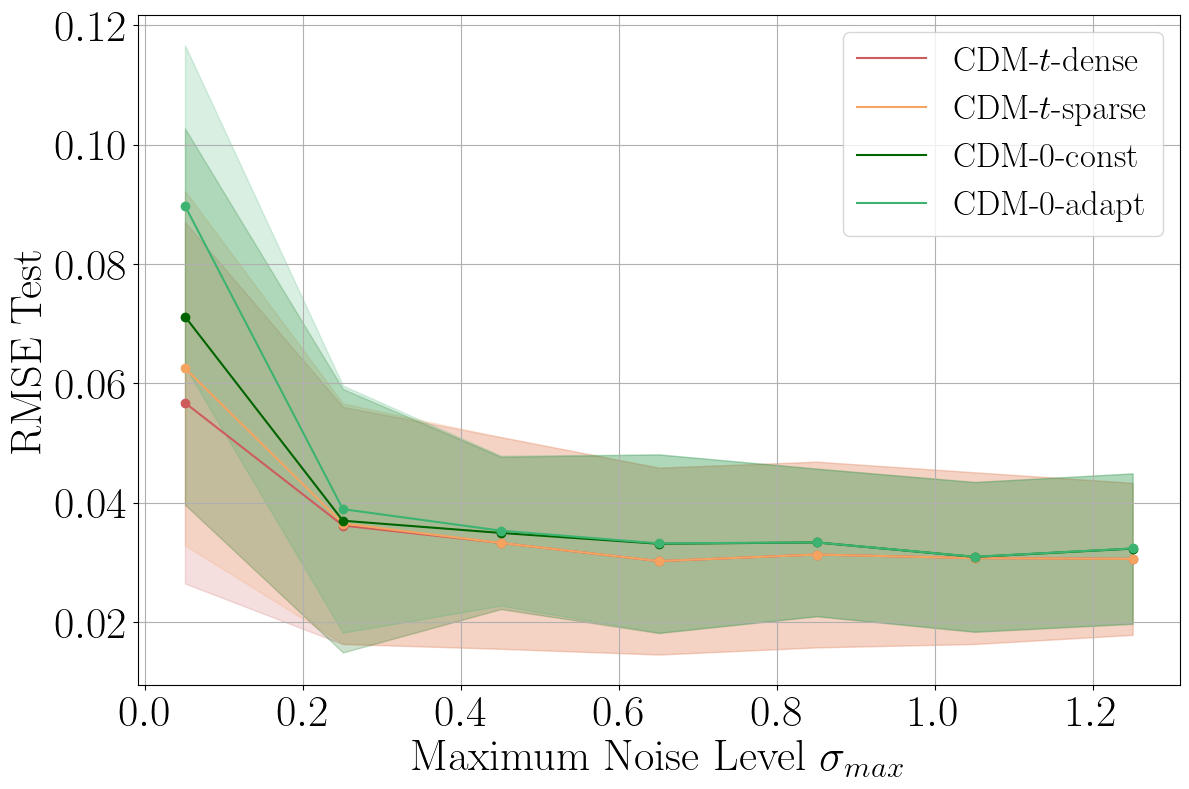

In [8]:


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

EBM1_color = "darkgreen"
EBM2_color = "mediumseagreen"

CDM1_color = "indianred"
CDM2_color = "sandybrown"


plt.plot(unique_sigma, mean_refine1_plot, color=CDM1_color, label=r"CDM-$t$-dense")
plt.plot(unique_sigma, mean_refine1_plot, 'o', color=CDM1_color)
plt.fill_between(unique_sigma,
                    mean_refine1_plot - std_refine1_plot,
                    mean_refine1_plot + std_refine1_plot,
                    alpha=0.2, color=CDM1_color)

plt.plot(unique_sigma, mean_refine2_plot, color=CDM2_color, label=r"CDM-$t$-sparse")
plt.plot(unique_sigma, mean_refine2_plot, 'o', color=CDM2_color)
plt.fill_between(unique_sigma,
                    mean_refine2_plot - std_refine2_plot,
                    mean_refine2_plot + std_refine2_plot,
                    alpha=0.2, color=CDM2_color)

plt.plot(unique_sigma, mean_refine1_ebm_plot, color=EBM1_color, label=r"CDM-$0$-const")
plt.plot(unique_sigma, mean_refine1_ebm_plot, 'o', color=EBM1_color)
plt.fill_between(unique_sigma,
                    mean_refine1_ebm_plot - std_refine1_ebm_plot,
                    mean_refine1_ebm_plot + std_refine1_ebm_plot,
                    alpha=0.2, color=EBM1_color)

plt.plot(unique_sigma, mean_refine2_ebm_plot, color=EBM2_color, label=r"CDM-$0$-adapt")
plt.plot(unique_sigma, mean_refine2_ebm_plot, 'o', color=EBM2_color)
plt.fill_between(unique_sigma,
                    mean_refine2_ebm_plot - std_refine2_ebm_plot,
                    mean_refine2_ebm_plot + std_refine2_ebm_plot,
                    alpha=0.2, color=EBM2_color)


plt.xlabel(r'Maximum Noise Level $\sigma_{max}$', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
# plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
# plt.ylim(0.005, 0.09)
plt.tight_layout()
plt.grid()
plt.savefig("scaling_sigma_max_V3.png")